# 0. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the synthetic datasets for each county
copiah_df = pd.read_csv('data/Copiah_county_synthetic_data.csv')
claiborne_df = pd.read_csv('data/Claiborne_county_synthetic_data.csv')
warren_df = pd.read_csv('data/Warren_county_synthetic_data.csv')

# Combine the datasets into a single DataFrame
data = pd.concat([copiah_df, claiborne_df, warren_df], ignore_index=True)

# Preview the combined data
print(data.head())

# List of counties for iteration
counties = data['County'].unique()

          County   Race  Age  Gender    Education Level Employment Status  \
0  Copiah County  White   48  Female  Bachelor's Degree          Employed   
1  Copiah County  Black   70    Male        High School        Unemployed   
2  Copiah County  White   73    Male        High School          Employed   
3  Copiah County  White   26    Male       Some College        Unemployed   
4  Copiah County  White   38  Female    Master's Degree          Employed   

   Income Level  Prior Convictions  Risk Score  Judge Decision  Re-offense  
0  34165.969893                  1    8.774172               0           1  
1  34114.425797                  1    8.721143               0           1  
2  15609.381871                  1    7.324792               1           0  
3  34123.411699                  0    6.118390               1           0  
4  73289.622946                  0    2.793611               1           0  


# 1. Analyze the demographic profiles of three counties

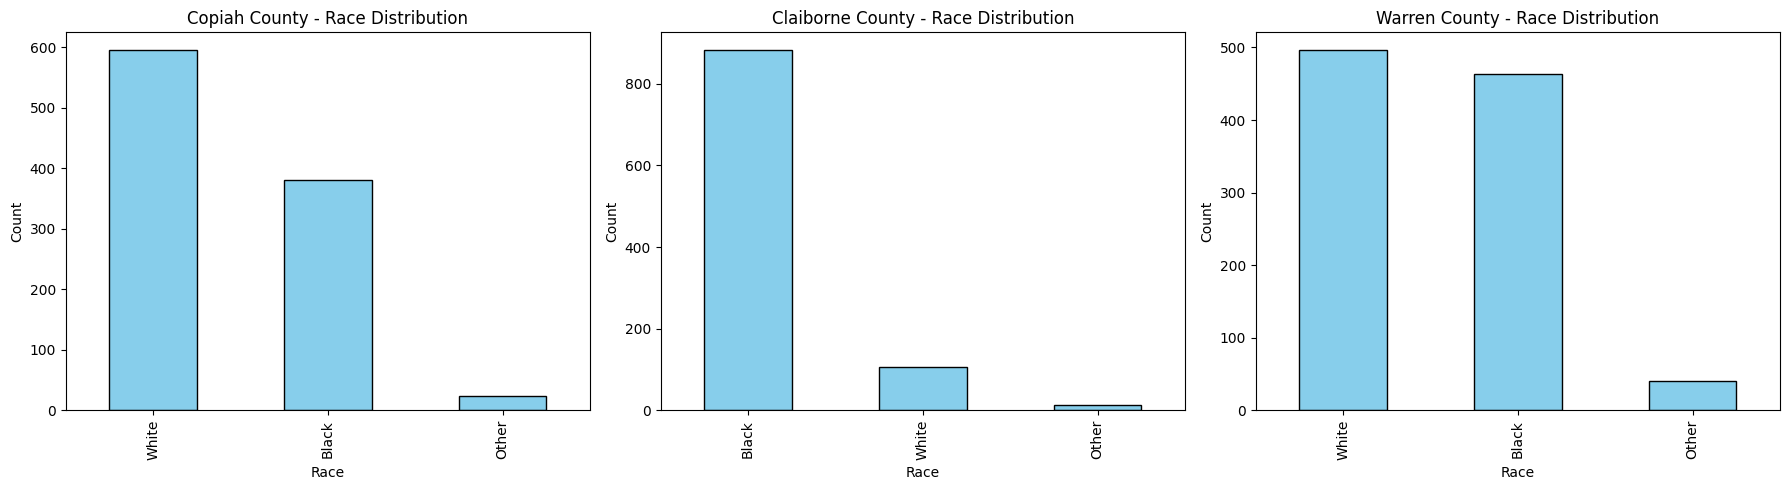

In [3]:
# Visualize Race Distribution per County using bar charts
fig, axes = plt.subplots(1, len(counties), figsize=(18, 5))
for ax, county in zip(axes, counties):
    county_data = data[data['County'] == county]
    race_counts = county_data['Race'].value_counts()
    race_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{county} - Race Distribution')
    ax.set_xlabel('Race')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


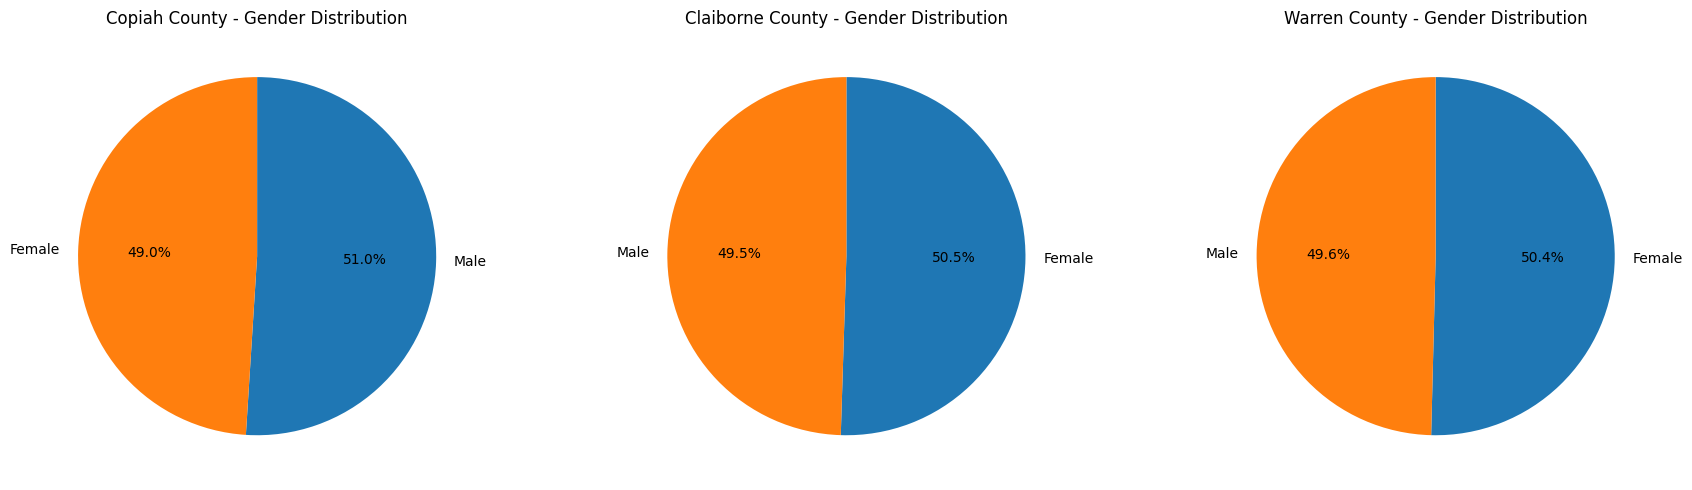

In [4]:
# Visualize Gender Distribution per County using pie charts
fig, axes = plt.subplots(1, len(counties), figsize=(18, 5))
for ax, county in zip(axes, counties):
    county_data = data[data['County'] == county]
    gender_counts = county_data['Gender'].value_counts()
    gender_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(f'{county} - Gender Distribution')
    ax.set_ylabel('') 
plt.tight_layout()
plt.show()

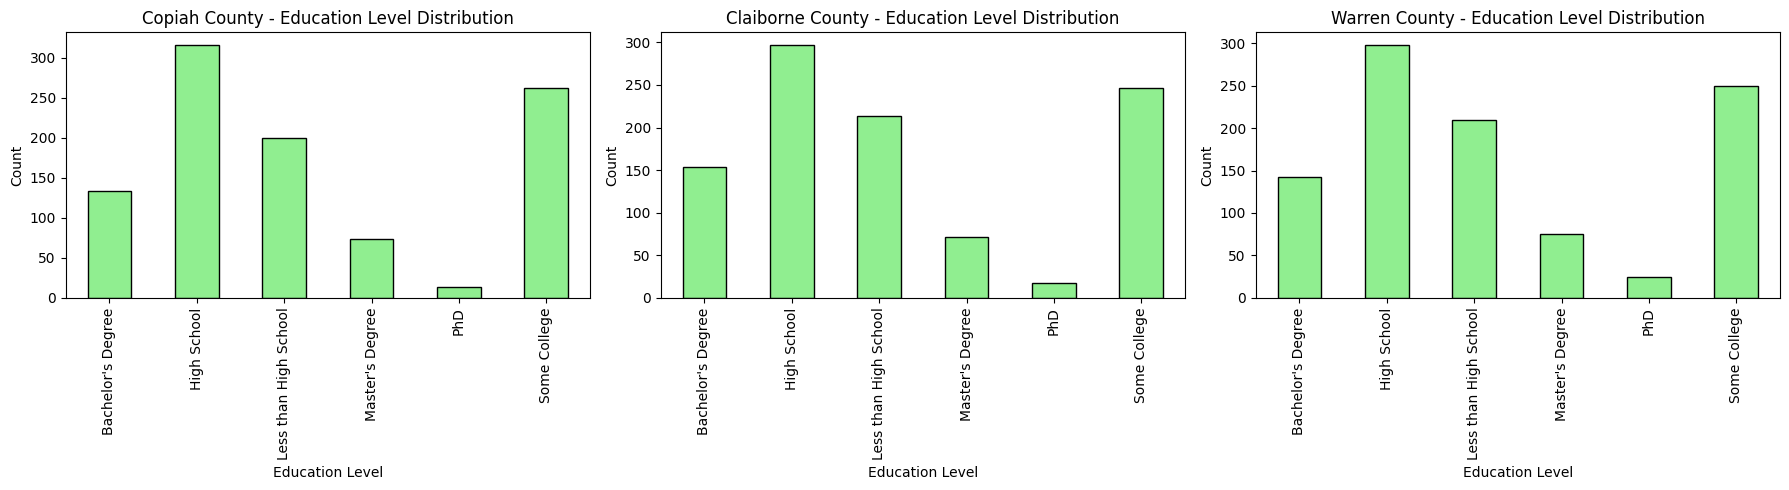

In [5]:
# Visualize Education Level Distribution per County using bar charts
fig, axes = plt.subplots(1, len(counties), figsize=(18, 5))
for ax, county in zip(axes, counties):
    county_data = data[data['County'] == county]
    edu_counts = county_data['Education Level'].value_counts().sort_index()
    edu_counts.plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
    ax.set_title(f'{county} - Education Level Distribution')
    ax.set_xlabel('Education Level')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

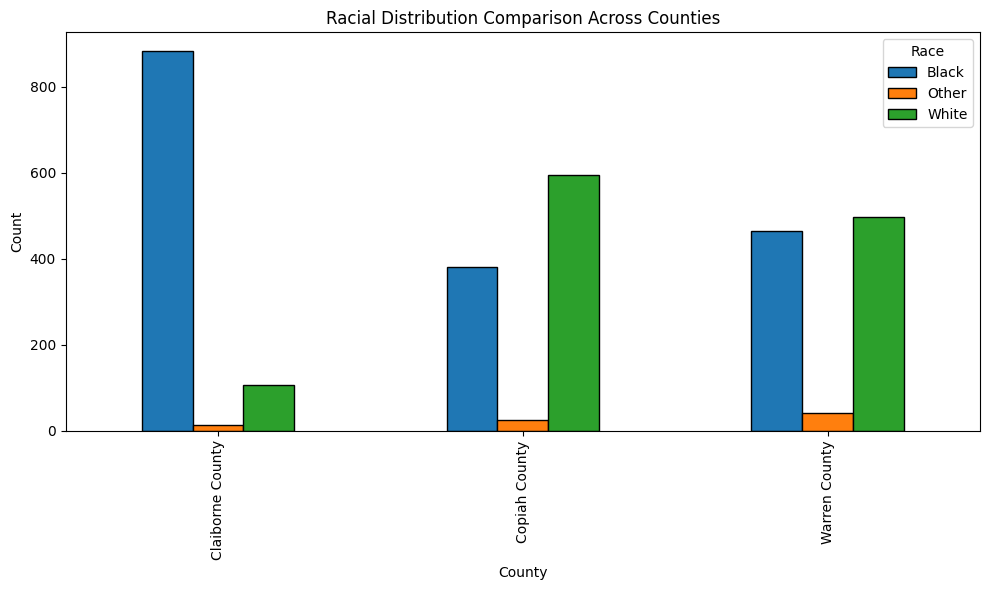

In [6]:
# Race Comparison
race_comparison = pd.crosstab(data['County'], data['Race'])
race_comparison.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Racial Distribution Comparison Across Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

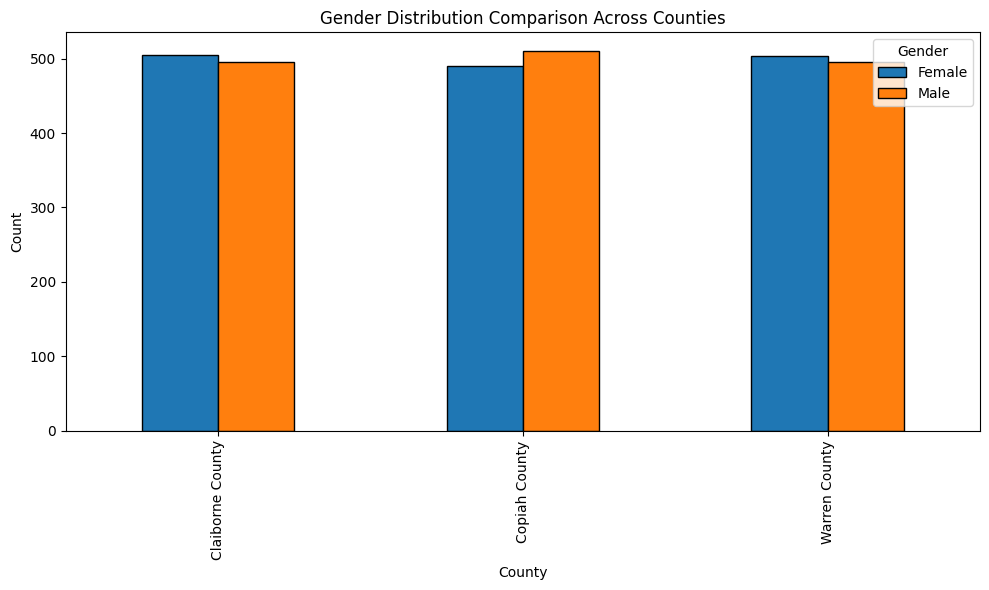

In [7]:
# Gender Comparison
gender_comparison = pd.crosstab(data['County'], data['Gender'])
gender_comparison.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Gender Distribution Comparison Across Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 2. Evaluate risk scores across demographic groups

In [8]:
# Summary by Race
risk_by_race = data.groupby(['County', 'Race'])['Risk Score'].mean().reset_index()
print("Average Risk Scores by Race:")
print(risk_by_race)

Average Risk Scores by Race:
             County   Race  Risk Score
0  Claiborne County  Black    5.910654
1  Claiborne County  Other    4.948736
2  Claiborne County  White    4.504300
3     Copiah County  Black    5.846286
4     Copiah County  Other    4.536890
5     Copiah County  White    4.819635
6     Warren County  Black    5.795578
7     Warren County  Other    4.656769
8     Warren County  White    4.876668


In [9]:
# Summary by Gender
risk_by_gender = data.groupby(['County', 'Gender'])['Risk Score'].mean().reset_index()
print("\nAverage Risk Scores by Gender:")
print(risk_by_gender)


Average Risk Scores by Gender:
             County  Gender  Risk Score
0  Claiborne County  Female    5.762968
1  Claiborne County    Male    5.736845
2     Copiah County  Female    5.175465
3     Copiah County    Male    5.231423
4     Warren County  Female    5.258912
5     Warren County    Male    5.330150


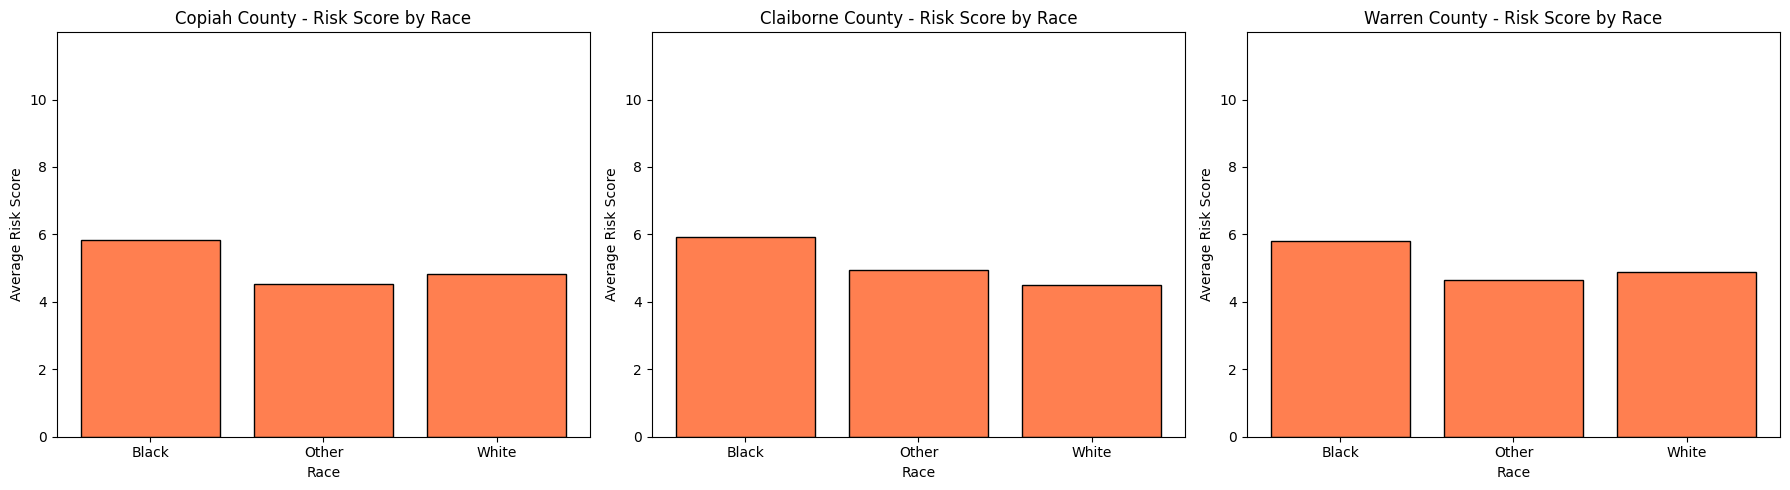

In [10]:
# Visualize Risk Scores by Race for each county using bar charts
counties = data['County'].unique()
fig, axes = plt.subplots(1, len(counties), figsize=(18, 5))
for ax, county in zip(axes, counties):
    county_race = risk_by_race[risk_by_race['County'] == county]
    ax.bar(county_race['Race'], county_race['Risk Score'], color='coral', edgecolor='black')
    ax.set_title(f'{county} - Risk Score by Race')
    ax.set_xlabel('Race')
    ax.set_ylabel('Average Risk Score')
    ax.set_ylim(0, data['Risk Score'].max() + 1)
plt.tight_layout()
plt.show()

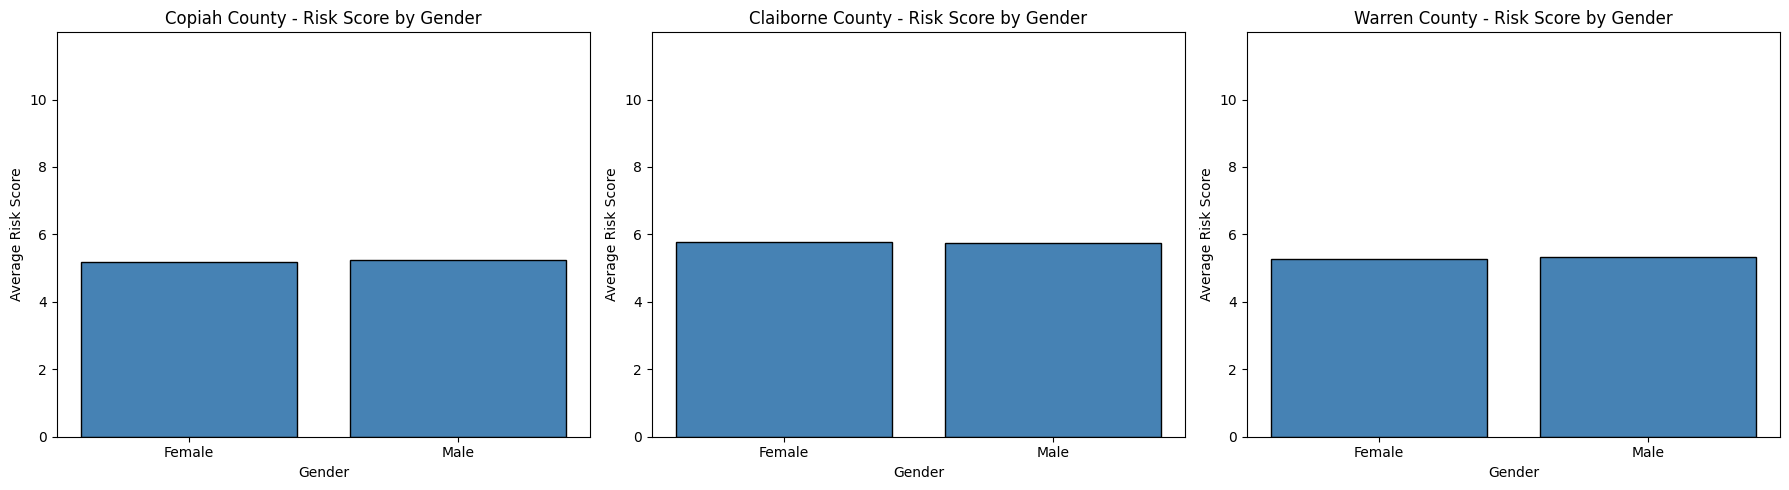

In [11]:
# Visualize Risk Scores by Gender for each county using bar charts
fig, axes = plt.subplots(1, len(counties), figsize=(18, 5))
for ax, county in zip(axes, counties):
    county_gender = risk_by_gender[risk_by_gender['County'] == county]
    ax.bar(county_gender['Gender'], county_gender['Risk Score'], color='steelblue', edgecolor='black')
    ax.set_title(f'{county} - Risk Score by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Average Risk Score')
    ax.set_ylim(0, data['Risk Score'].max() + 1)
plt.tight_layout()
plt.show()

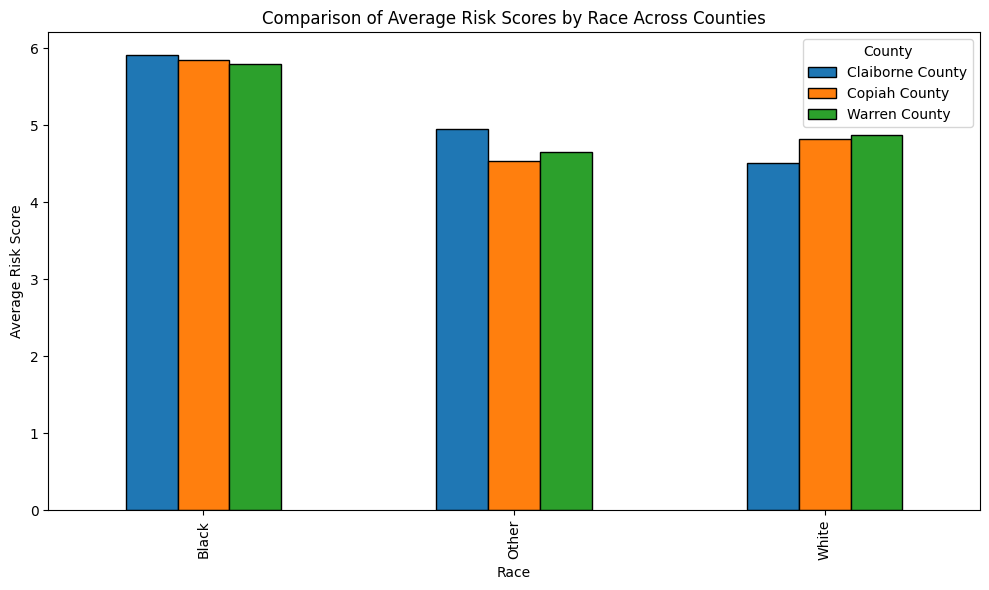

In [12]:
# Grouped bar chart for Race
pivot_race = risk_by_race.pivot(index='Race', columns='County', values='Risk Score')
pivot_race.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Comparison of Average Risk Scores by Race Across Counties')
plt.xlabel('Race')
plt.ylabel('Average Risk Score')
plt.tight_layout()
plt.show()

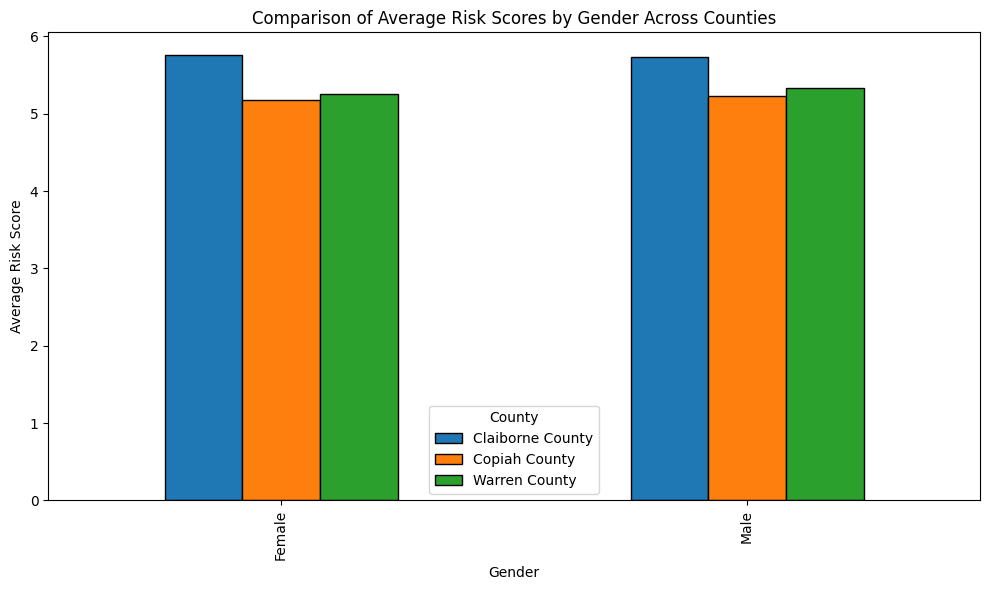

In [13]:
# Grouped bar chart for Gender
pivot_gender = risk_by_gender.pivot(index='Gender', columns='County', values='Risk Score')
pivot_gender.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Comparison of Average Risk Scores by Gender Across Counties')
plt.xlabel('Gender')
plt.ylabel('Average Risk Score')
plt.tight_layout()
plt.show()

# 3. Compare judges’ bail decisions to AI risk scores

In [14]:
# Create a new column with the risk scores rounded DOWN to the next whole number
data['rounded_risk'] = np.floor(data['Risk Score'])

Overall Rounded Risk vs Judge Decision:
Judge Decision    0    1
rounded_risk            
0.0               4   45
1.0              12   96
2.0              36  189
3.0              58  333
4.0             185  318
5.0             330  218
6.0             309  167
7.0             306   59
8.0             165   27
9.0              81   14
10.0             39    9


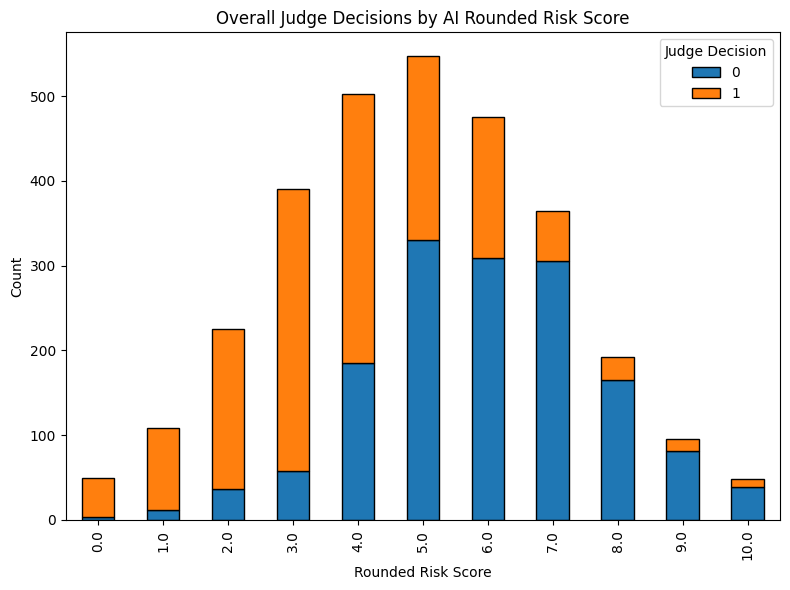

In [15]:
# Overall Cross-Tabulation: Rounded Risk vs Judge Decision
overall_crosstab = pd.crosstab(data['rounded_risk'], data['Judge Decision'])
print("Overall Rounded Risk vs Judge Decision:")
print(overall_crosstab)

overall_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black')
plt.title("Overall Judge Decisions by AI Rounded Risk Score")
plt.xlabel("Rounded Risk Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Average Decision Counts for Race: White
Judge Decision   0    1
rounded_risk           
0.0              0   35
1.0             11   62
2.0             17  100
3.0             30  158
4.0             39  195
5.0             39  167
6.0             59  114
7.0             92   10
8.0             34   11
9.0             15    0
10.0             8    1


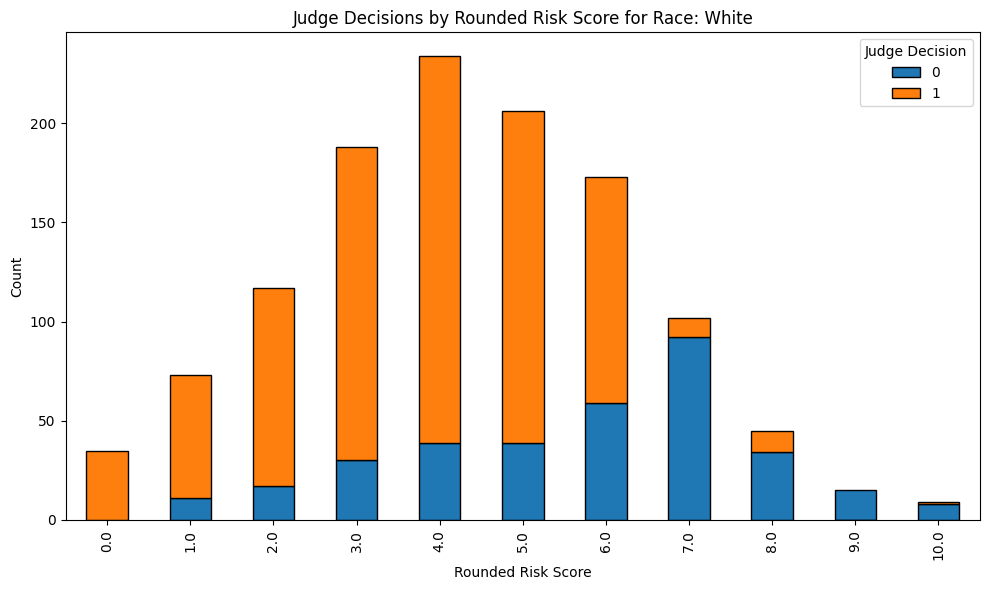


Average Decision Counts for Race: Black
Judge Decision    0    1
rounded_risk            
0.0               3    7
1.0               1   31
2.0              17   80
3.0              24  163
4.0             143  113
5.0             291   45
6.0             245   49
7.0             207   47
8.0             127   15
9.0              66   14
10.0             31    8


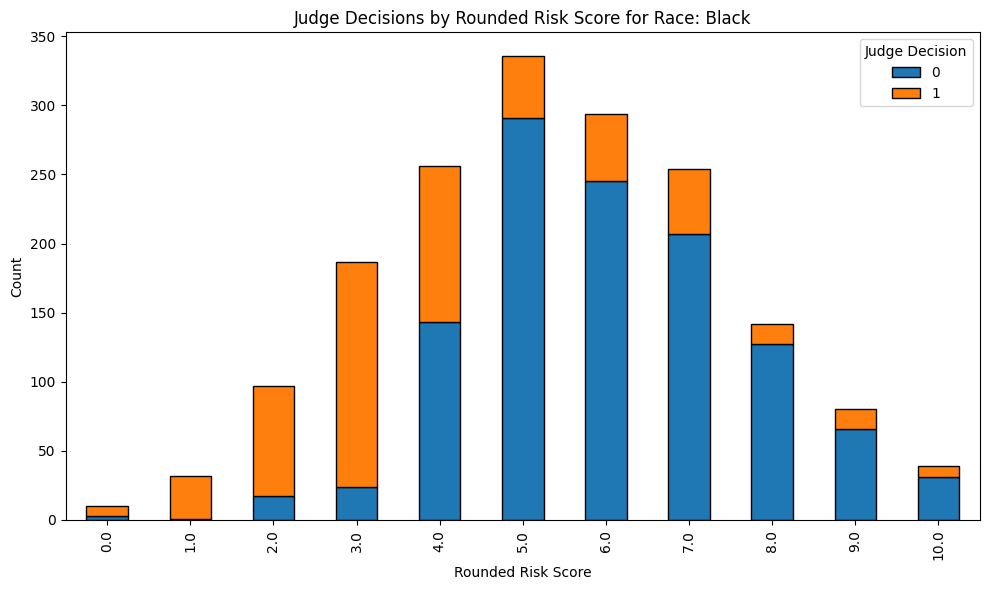


Average Decision Counts for Race: Other
Judge Decision  0   1
rounded_risk         
0.0             1   3
1.0             0   3
2.0             2   9
3.0             4  12
4.0             3  10
5.0             0   6
6.0             5   4
7.0             7   2
8.0             4   1


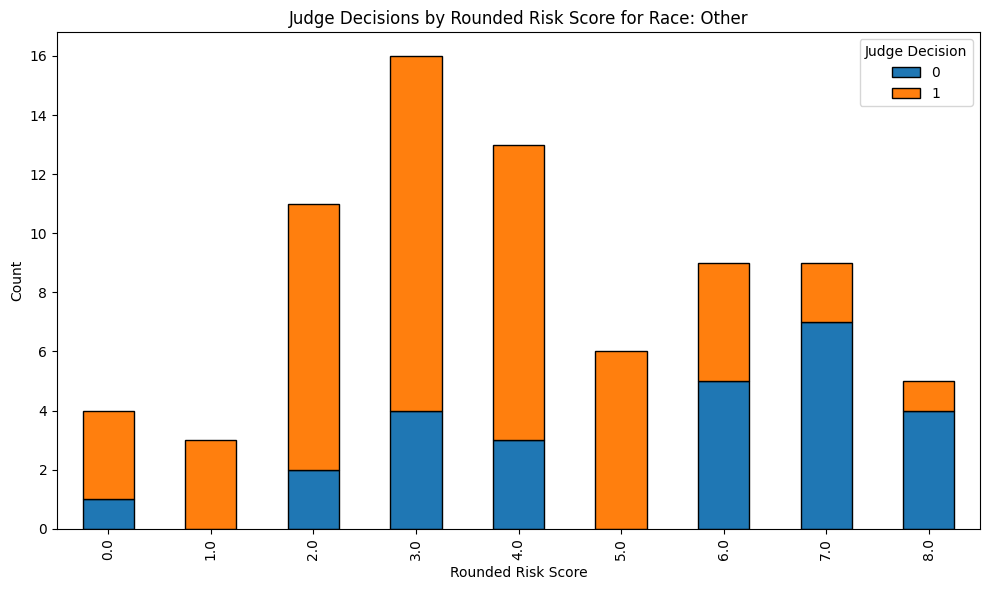

In [16]:
# Cross-tabulate Rounded Risk Scores and Judge Decisions by Race

races = data['Race'].unique()
for race in races:
    subset = data[data['Race'] == race]
    ctab = pd.crosstab(subset['rounded_risk'], subset['Judge Decision'])
    print(f"\nAverage Decision Counts for Race: {race}")
    print(ctab)
    
    # Stacked bar chart for each race group
    ax = ctab.plot(kind='bar', stacked=True, figsize=(10,6), edgecolor='black',
                   title=f"Judge Decisions by Rounded Risk Score for Race: {race}")
    ax.set_xlabel("Rounded Risk Score")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()


Average Decision Counts for Gender: Female
Judge Decision    0    1
rounded_risk            
0.0               2   21
1.0               8   51
2.0              18  101
3.0              28  163
4.0              98  150
5.0             163  112
6.0             160   91
7.0             143   25
8.0              74   12
9.0              44    4
10.0             27    4


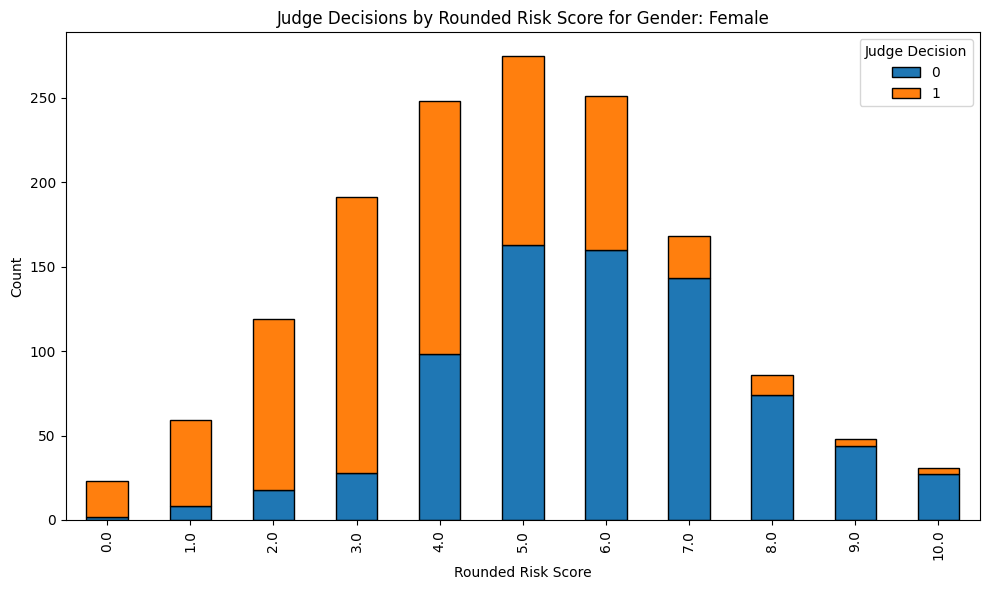


Average Decision Counts for Gender: Male
Judge Decision    0    1
rounded_risk            
0.0               2   24
1.0               4   45
2.0              18   88
3.0              30  170
4.0              87  168
5.0             167  106
6.0             149   76
7.0             163   34
8.0              91   15
9.0              37   10
10.0             12    5


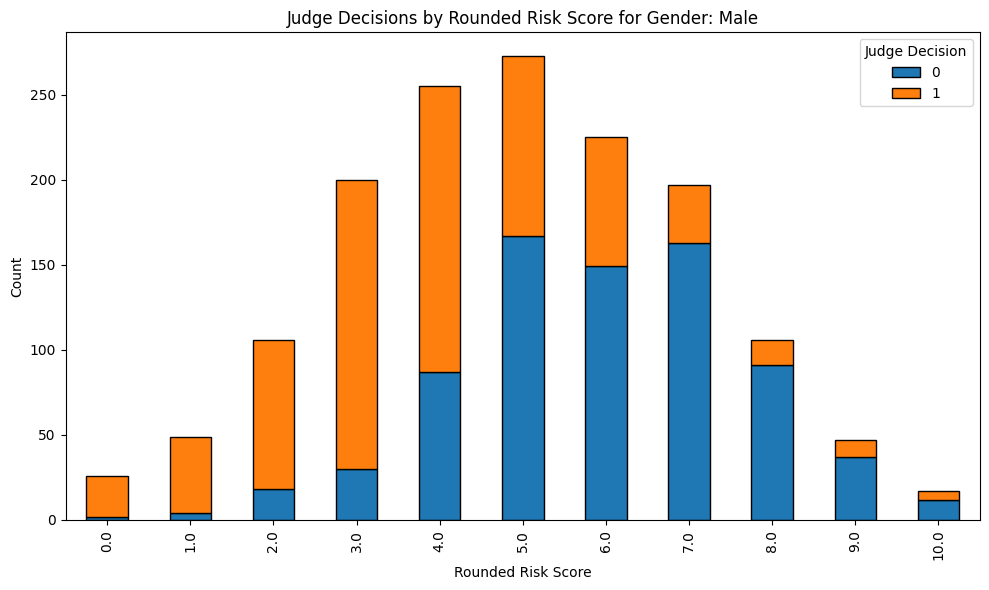

In [17]:
# Cross-tabulate Rounded Risk Scores and Judge Decisions by Gender

genders = data['Gender'].unique()
for gender in genders:
    subset = data[data['Gender'] == gender]
    ctab = pd.crosstab(subset['rounded_risk'], subset['Judge Decision'])
    print(f"\nAverage Decision Counts for Gender: {gender}")
    print(ctab)
    
    # Stacked bar chart for each gender group
    ax = ctab.plot(kind='bar', stacked=True, figsize=(10,6), edgecolor='black',
                   title=f"Judge Decisions by Rounded Risk Score for Gender: {gender}")
    ax.set_xlabel("Rounded Risk Score")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()

# 4. Analyze re-offense rates and fairness metrics:

In [18]:
# Define the threshold for binary classification of risk scores
threshold = 5

# Create a binary predicted outcome based on the risk score
# Predicted = 1 if risk score is high (>= threshold), 0 otherwise
data['Predicted'] = (data['Risk Score'] >= threshold).astype(int)

# Assume that the 'Re-offense' column is binary (1 if re-offense occurred, 0 otherwise)
data['Actual'] = data['Re-offense']

In [19]:
# Calculate re-offense rates and fairness metrics (FPR and FNR) for each racial group
results = []

for race in data['Race'].unique():
    group = data[data['Race'] == race]
    
    # Calculate components of the confusion matrix
    TP = ((group['Predicted'] == 1) & (group['Actual'] == 1)).sum()
    TN = ((group['Predicted'] == 0) & (group['Actual'] == 0)).sum()
    FP = ((group['Predicted'] == 1) & (group['Actual'] == 0)).sum()
    FN = ((group['Predicted'] == 0) & (group['Actual'] == 1)).sum()
    
    # Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
    FPR = FP / (FP + TN) if (FP + TN) > 0 else np.nan
    FNR = FN / (FN + TP) if (FN + TP) > 0 else np.nan
    
    # Re-offense rate: proportion of individuals who actually re-offended
    reoffense_rate = group['Actual'].mean()
    
    results.append({
        'Race': race,
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'FPR': FPR,
        'FNR': FNR,
        'Reoffense Rate': reoffense_rate
    })

results_df = pd.DataFrame(results)
print("Fairness Metrics and Re-offense Rates by Race:")
print(results_df)


Fairness Metrics and Re-offense Rates by Race:
    Race   TP   TN   FP   FN       FPR       FNR  Reoffense Rate
0  White  206  478  344  169  0.418491  0.450667        0.313283
1  Black  427  430  718  152  0.625436  0.262522        0.335263
2  Other    9   40   20    7  0.333333  0.437500        0.210526


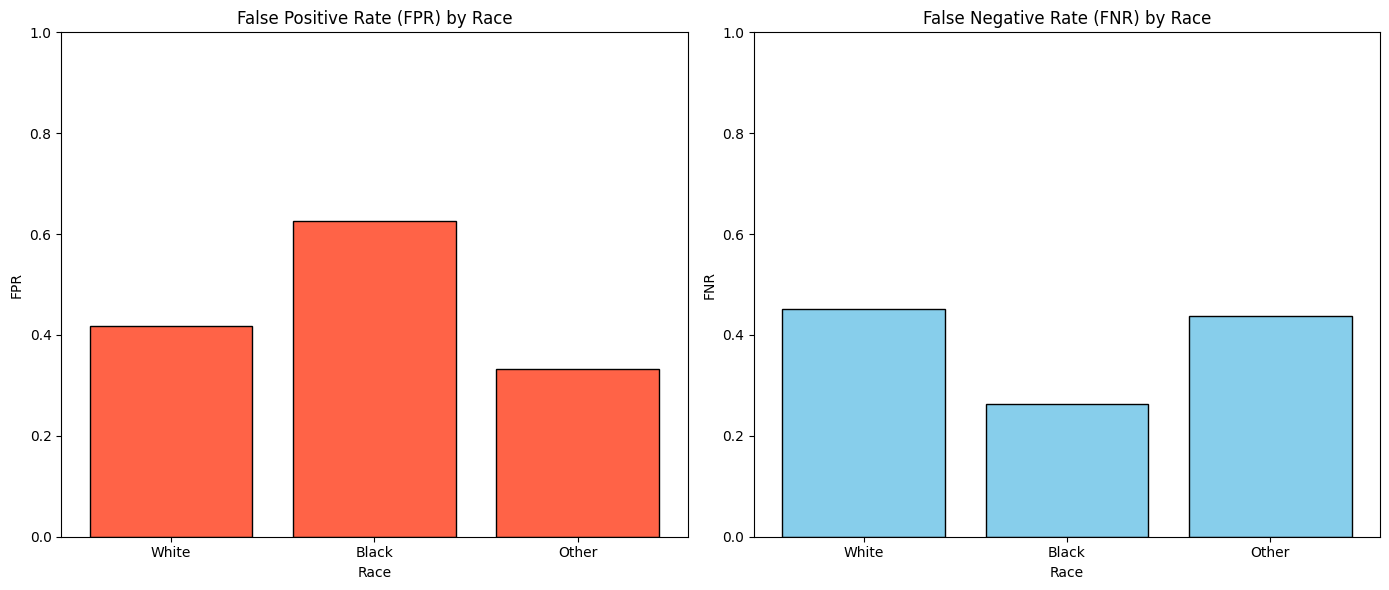

In [20]:
# Visualize the False Positive Rate (FPR) and False Negative Rate (FNR) across racial groups

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for False Positive Rate
ax[0].bar(results_df['Race'], results_df['FPR'], color='tomato', edgecolor='black')
ax[0].set_title('False Positive Rate (FPR) by Race')
ax[0].set_xlabel('Race')
ax[0].set_ylabel('FPR')
ax[0].set_ylim(0, 1)

# Bar chart for False Negative Rate
ax[1].bar(results_df['Race'], results_df['FNR'], color='skyblue', edgecolor='black')
ax[1].set_title('False Negative Rate (FNR) by Race')
ax[1].set_xlabel('Race')
ax[1].set_ylabel('FNR')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()